In [1]:
import datetime

import numpy as np
import pandas as pd
import random

from scipy.signal import find_peaks

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
STOCK_NAME = 'JET AIRWAYS'
STOCK_PRICE_FILE = './../database/532617.csv'

In [3]:
price_data = pd.read_csv(STOCK_PRICE_FILE,index_col = 0, parse_dates = True,
                             usecols = [u'Date',u'Open Price', u'High Price', u'Low Price', u'Close Price'],
                             dtype= {u'Open Price':np.float64,u'High Price':np.float64,
                                     u'Low Price':np.float64,u'Close Price':np.float64}).sort_index()

In [4]:
SAMPLE_LENGTH = 120
start_ix = random.randint(0,len(price_data)-SAMPLE_LENGTH)
sample_data = price_data[start_ix:start_ix+SAMPLE_LENGTH]
sample_data.head(4)

,Open Price,High Price,Low Price,Close Price
Date,,,,
2012-02-15,331.0,346.00,325.10,336.85
2012-02-16,337.8,355.75,337.80,344.65
2012-02-17,340.0,348.00,327.00,328.85
2012-02-21,335.0,355.40,326.75,352.30


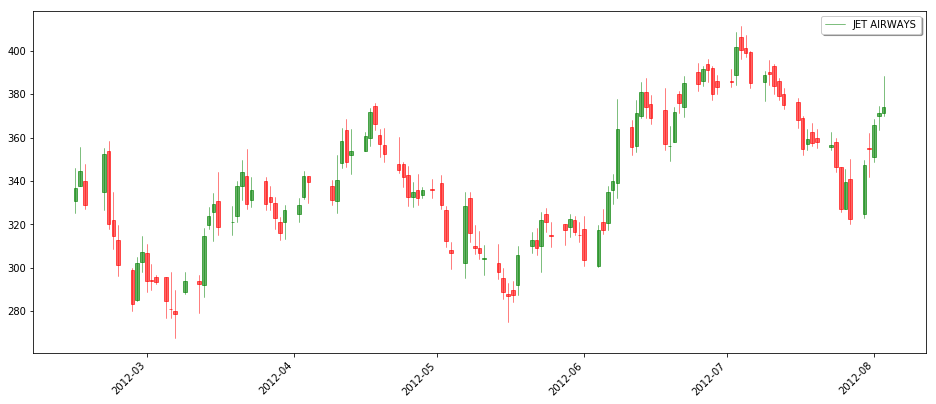

In [5]:
fig, ax = plt.subplots(figsize = (16,7))
fig.subplots_adjust(bottom=0.2)

quotes = zip(mdates.date2num(sample_data.index.to_pydatetime()),sample_data[u'Open Price'], 
                             sample_data[u'High Price'],sample_data[u'Low Price'], sample_data[u'Close Price'])
candlestick_ohlc(ax,quotes,width=0.75,colorup='g',colordown='red',alpha=0.6)
ax.xaxis_date()
ax.legend([STOCK_NAME],loc='upper right', shadow=True, fancybox=True)
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
plt.show()

## Find High Points

In [18]:
high_price_seq = sample_data['High Price'].values
ma = pd.Series(high_price_seq,index=sample_data.index).rolling(window=6).mean().fillna(method='bfill')
height_of_peak = (ma*0.005).values
peaks,peaks_properties = find_peaks(high_price_seq,distance=1,prominence=5)

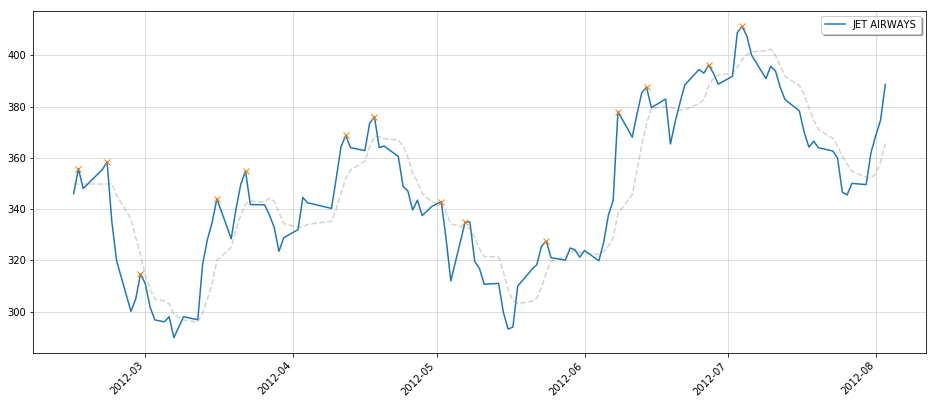

In [19]:
fig, ax = plt.subplots(figsize = (16,7))
fig.subplots_adjust(bottom=0.2)

plt.plot(pd.Series(high_price_seq,index=sample_data.index))
plt.plot(sample_data.index[peaks], pd.Series(high_price_seq,index=sample_data.index)[peaks], "x")

plt.plot(ma, "--", color="gray", alpha=0.35)

ax.xaxis_date()
ax.legend([STOCK_NAME],loc='upper right', shadow=True, fancybox=True)
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
plt.show()

In [8]:
pd.Series(high_price_seq,index=sample_data.index)[peaks]

Date
2012-02-16    355.75
2012-02-22    358.40
2012-02-29    314.70
2012-03-16    344.00
2012-03-22    354.85
2012-04-12    368.70
2012-04-18    376.00
2012-05-02    342.90
2012-05-07    334.95
2012-05-24    327.50
2012-06-08    378.00
2012-06-14    387.50
2012-06-27    396.20
2012-07-04    411.35
dtype: float64

## Find Low Points

In [22]:
low_price_seq = sample_data['Low Price'].values
low_price_seq_inv = sample_data['Low Price'].values*-1
ma_inv = pd.Series(low_price_seq_inv,index=sample_data.index).rolling(window=6).mean().fillna(method='bfill')
depth_of_trough = (ma_inv*0.005).values
troughs,troughs_properties = find_peaks(low_price_seq_inv,distance=1,prominence=5)

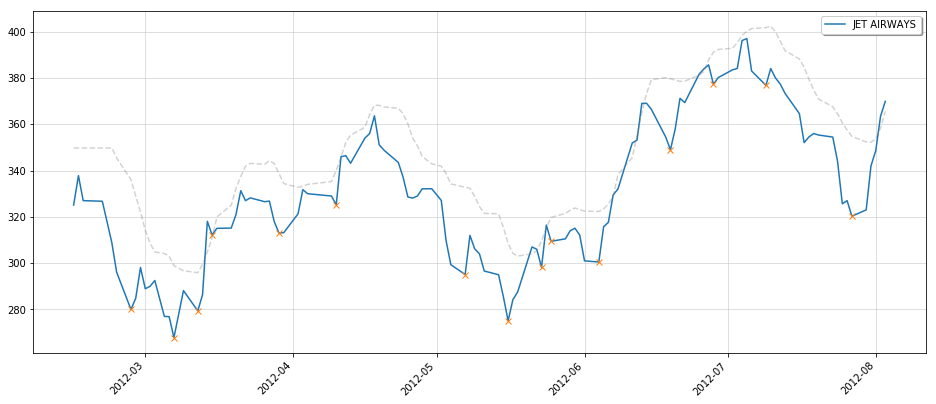

In [24]:
fig, ax = plt.subplots(figsize = (16,7))
fig.subplots_adjust(bottom=0.2)

plt.plot(pd.Series(low_price_seq,index=sample_data.index))
plt.plot(sample_data.index[troughs], pd.Series(low_price_seq,index=sample_data.index)[troughs], "x")

plt.plot(ma, "--", color="gray", alpha=0.35)

ax.xaxis_date()
ax.legend([STOCK_NAME],loc='upper right', shadow=True, fancybox=True)
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
plt.show()

## Combine Interest Points

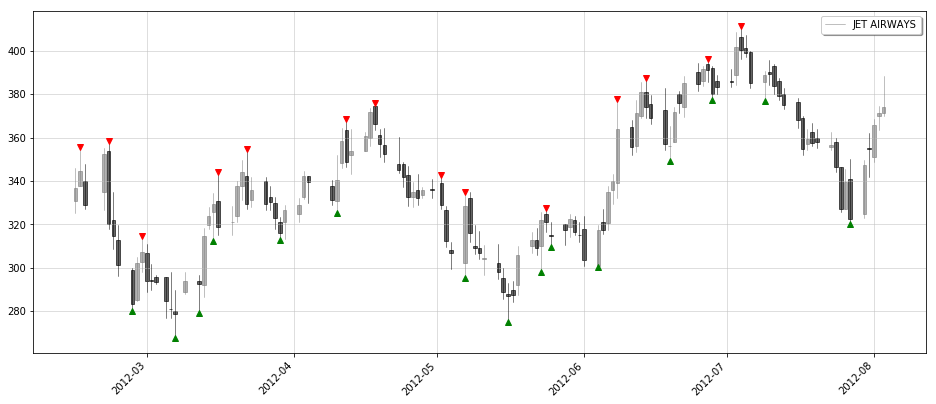

In [32]:
fig, ax = plt.subplots(figsize = (16,7))
fig.subplots_adjust(bottom=0.2)

quotes = zip(mdates.date2num(sample_data.index.to_pydatetime()),sample_data[u'Open Price'], 
                             sample_data[u'High Price'],sample_data[u'Low Price'], sample_data[u'Close Price'])
candlestick_ohlc(ax,quotes,width=0.75,colorup='grey',colordown='black',alpha=0.6)

plt.plot(sample_data.index[peaks], pd.Series(high_price_seq,index=sample_data.index)[peaks], "v", color='red')
plt.plot(sample_data.index[troughs], pd.Series(low_price_seq,index=sample_data.index)[troughs], "^", color='green')

ax.xaxis_date()
ax.legend([STOCK_NAME],loc='upper right', shadow=True, fancybox=True)
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
plt.show()